# Design of AI systems

In this assignment, we built a rule based classifier in order to determine wether a tumour is benign or malignant.

## Assignment 5, Eric Johansson & Max Sonnelid

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
with open('data/wdbc.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
data.head()

id  malignant  radius_0  texture_0  perimeter_0  area_0  \
0    842302          1     17.99      10.38       122.80  1001.0   
1    842517          1     20.57      17.77       132.90  1326.0   
2  84300903          1     19.69      21.25       130.00  1203.0   
3  84348301          1     11.42      20.38        77.58   386.1   
4  84358402          1     20.29      14.34       135.10  1297.0   

   smoothness_0  compactness_0  concavity_0  concave points_0  ...  radius_2  \
0       0.11840        0.27760       0.3001           0.14710  ...     25.38   
1       0.08474        0.07864       0.0869           0.07017  ...     24.99   
2       0.10960        0.15990       0.1974           0.12790  ...     23.57   
3       0.14250        0.28390       0.2414           0.10520  ...     14.91   
4       0.10030        0.13280       0.1980           0.10430  ...     22.54   

   texture_2  perimeter_2  area_2  smoothness_2  compactness_2  concavity_2  \
0      17.33       184.60  2019.0        0.1622         0.6656       0.7119   
1      23.41       158.80  1956.0        0.1238         0.1866       0.2416   
2      25.53       152.50  1709.0        0.1444         0.4245       0.4504   
3      26.50        98.87   567.7        0.2098         0.8663       0.6869   
4      16.67       152.20  1575.0        0.1374         0.2050       0.4000   

   concave points_2  symmetry_2  fractal dimension_2  
0            0.2654      0.4601              0.11890  
1            0.1860      0.2750              0.08902  
2            0.2430      0.3613              0.08758  
3            0.2575      0.6638              0.17300  
4            0.1625      0.2364              0.07678  

[5 rows x 32 columns]

In [4]:
data.columns

Index(['id', 'malignant', 'radius_0', 'texture_0', 'perimeter_0', 'area_0',
       'smoothness_0', 'compactness_0', 'concavity_0', 'concave points_0',
       'symmetry_0', 'fractal dimension_0', 'radius_1', 'texture_1',
       'perimeter_1', 'area_1', 'smoothness_1', 'compactness_1', 'concavity_1',
       'concave points_1', 'symmetry_1', 'fractal dimension_1', 'radius_2',
       'texture_2', 'perimeter_2', 'area_2', 'smoothness_2', 'compactness_2',
       'concavity_2', 'concave points_2', 'symmetry_2', 'fractal dimension_2'],
      dtype='object')

In [5]:
radius_cols = ['radius_0', 'radius_1', 'radius_2']
radius = data[radius_cols]

In [6]:
radius0 = radius[radius.columns[0]]
radius1 = radius[radius.columns[1]]
radius2 = radius[radius.columns[2]]


(array([ 4., 15., 31., 48., 93., 92., 71., 58., 32., 23., 22., 28., 27.,
        11.,  2.,  5.,  2.,  2.,  0.,  3.]),
 array([ 6.981  ,  8.03745,  9.0939 , 10.15035, 11.2068 , 12.26325,
        13.3197 , 14.37615, 15.4326 , 16.48905, 17.5455 , 18.60195,
        19.6584 , 20.71485, 21.7713 , 22.82775, 23.8842 , 24.94065,
        25.9971 , 27.05355, 28.11   ]),
 <a list of 20 Patch objects>)

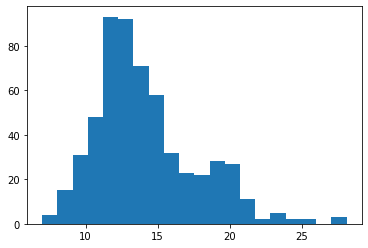

In [7]:
plt.hist(radius0, bins = 20)
#plt.hist(radius1, bins = 20)
#plt.hist(radius2, bins = 20)

In [8]:
radius1.describe()

count    569.000000
mean       0.405172
std        0.277313
min        0.111500
25%        0.232400
50%        0.324200
75%        0.478900
max        2.873000
Name: radius_1, dtype: float64

In [9]:
badCells = data[data['malignant']==1]
goodCells = data[data['malignant']==0]
radius_badCells = badCells[radius_cols]

# Size thresholds

In [87]:
area_good = goodCells['area_0']
area_bad = badCells['area_0']

In [88]:
# Choosing a threshhold for what is abnormal. Area above threshold is considered a bad sign
threshold_area = area_good.describe(include='all').loc['75%']+area_good.describe(include='all').loc['std']*2
threshold_area

819.6742362941192

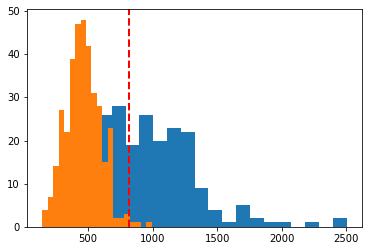

In [89]:


plt.hist(area_bad, bins=20)
plt.hist(area_good, bins = 20)
plt.axvline(x=threshold_area, color='r', linestyle='dashed', linewidth=2)
plt.savefig('size_plot.png')

# Shape thresholds

## Checking if shape can be described as perimeter/area

In [13]:
shape_cols = ['perimeter_0', 'area_0', 'perimeter_1', 'area_1', 'perimeter_2', 'area_2']
shape_good = goodCells[shape_cols]
shape_good['shape_0'] = shape_good['perimeter_0']/shape_good['area_0']
shape_good['shape_1'] = shape_good['perimeter_1']/shape_good['area_1']
shape_good['shape_2'] = shape_good['perimeter_2']/shape_good['area_2']

shape_bad = badCells[shape_cols]
shape_bad['shape_0'] = shape_bad['perimeter_0']/shape_bad['area_0']
shape_bad['shape_1'] = shape_bad['perimeter_1']/shape_bad['area_1']
shape_bad['shape_2'] = shape_bad['perimeter_2']/shape_bad['area_2']


In [14]:
print(shape_bad['shape_0'].describe())
print(' ')
print(shape_good['shape_0'].describe())

count    212.000000
mean       0.125965
std        0.023412
min        0.074730
25%        0.108704
50%        0.121338
75%        0.141991
max        0.202710
Name: shape_0, dtype: float64
 
count    357.000000
mean       0.176477
std        0.028502
min        0.115513
25%        0.156008
50%        0.171288
75%        0.189386
max        0.305157
Name: shape_0, dtype: float64


In [15]:
# Shape below threshold is considered a bad sign
threshold_shape = shape_good['shape_0'].describe(include='all').loc['75%']-shape_good['shape_0'].describe(include='all').loc['std']/2
threshold_shape

0.17513535964746452

Mean of shape at bad tumours 0.01909188424660167
Mean of shape at good tumours 0.027492179030757978


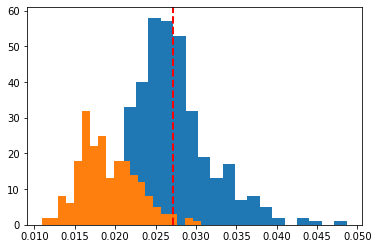

In [68]:
print(f"Mean of shape at bad tumours {shape_bad['shape_0'].mean()}")
print(f"Mean of shape at good tumours {shape_good['shape_0'].mean()}")

plt.hist(shape_good['shape_0'], bins = 20)
plt.hist(shape_bad['shape_0'], bins = 20)
plt.axvline(x=threshold_shape, color='r', linestyle='dashed', linewidth=2)

## Comparing above with shape = radius/area

In [17]:
shape_cols = ['radius_0', 'area_0', 'radius_1', 'area_1', 'radius_2', 'area_2']
shape_good = goodCells[shape_cols]
shape_good['shape_0'] = shape_good['radius_0']/shape_good['area_0']
shape_good['shape_1'] = shape_good['radius_1']/shape_good['area_1']
shape_good['shape_2'] = shape_good['radius_2']/shape_good['area_2']

shape_bad = badCells[shape_cols]
shape_bad['shape_0'] = shape_bad['radius_0']/shape_bad['area_0']
shape_bad['shape_1'] = shape_bad['radius_1']/shape_bad['area_1']
shape_bad['shape_2'] = shape_bad['radius_2']/shape_bad['area_2']


In [18]:
threshold_shape = shape_good['shape_0'].describe(include='all').loc['75%']-shape_good['shape_0'].describe(include='all').loc['std']/2
threshold_shape

0.02713289708901503

Mean of shape at bad tumours 0.01909188424660167
Mean of shape at good tumours 0.027492179030757978


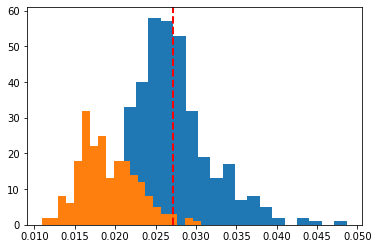

In [19]:
print(f"Mean of shape at bad tumours {shape_bad['shape_0'].mean()}")
print(f"Mean of shape at good tumours {shape_good['shape_0'].mean()}")
plt.hist(shape_good['shape_0'], bins = 20)
plt.hist(shape_bad['shape_0'], bins = 20)
plt.axvline(x=threshold_shape, color='r', linestyle='dashed', linewidth=2)
plt.show()

# Texture thresholds

In [137]:
texture_bad = badCells['texture_0']
texture_good = goodCells['texture_0']

In [138]:
print(texture_bad.describe())
print(' ')
print(texture_good.describe())

count    212.000000
mean      21.604906
std        3.779470
min       10.380000
25%       19.327500
50%       21.460000
75%       23.765000
max       39.280000
Name: texture_0, dtype: float64
 
count    357.000000
mean      17.914762
std        3.995125
min        9.710000
25%       15.150000
50%       17.390000
75%       19.760000
max       33.810000
Name: texture_0, dtype: float64


In [139]:
# Texure above threshold is considered a bad sign
threshold_texture = texture_good.describe(include='all').loc['75%']+texture_good.describe(include='all').loc['std']*5/2
threshold_texture

29.747811484189782

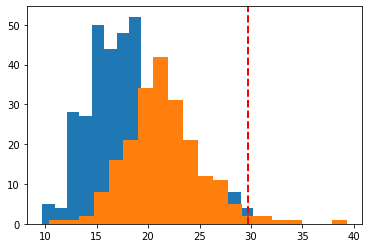

In [140]:
plt.hist(texture_good, bins = 20)
plt.hist(texture_bad, bins=20)
plt.axvline(x=threshold_texture, color='r', linestyle='dashed', linewidth=2)
plt.show()

# Homogenity thresholds

In [24]:
threshold_homogenity = goodCells['concave points_0'].describe(include='all').loc['75%']+goodCells['concave points_0'].describe(include='all').loc['std']*3
threshold_homogenity

0.08023633513482431

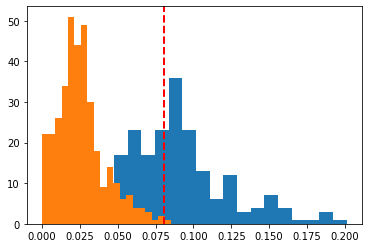

In [25]:
# Using concave points as a measure (which is the number of concave portions of the contour)
plt.hist(badCells['concave points_0'], bins = 20)
plt.hist(goodCells['concave points_0'], bins = 20)
plt.axvline(x=threshold_homogenity, color='r', linestyle='dashed', linewidth=2)
plt.show()

In [119]:
# Trying to check if the variance of radius, perimeter and area can say anything about homogenity
threshold_homogenity2 = goodCells['radius_1'].describe(include='all').loc['75%']+goodCells['radius_1'].describe(include='all').loc['std']*4

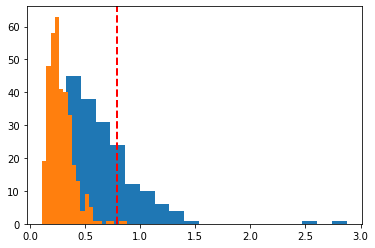

In [120]:
# Trying to check if the variance of radius, perimeter and area can say anything about homogenity
plt.hist(badCells['radius_1'], bins = 20)
plt.hist(goodCells['radius_1'], bins = 20)
#plt.hist(badCells['perimeter_1'], bins = 20)
#plt.hist(goodCells['perimeter_1'], bins = 20)
plt.axvline(x=threshold_homogenity2, color='r', linestyle='dashed', linewidth=2)
plt.show()


Using the standard deviation a meassure of homogenity seems like a good option. Since we use both radius and perimeter as two separate if statements, we use high thresholds in order to mitigate the risk of false-negatives.

## Splitting the data

In [26]:
target = data['malignant']
data = data.drop(columns=['malignant'])

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data,target, test_size = .2, random_state = 42)

In [28]:
data.columns

Index(['id', 'radius_0', 'texture_0', 'perimeter_0', 'area_0', 'smoothness_0',
       'compactness_0', 'concavity_0', 'concave points_0', 'symmetry_0',
       'fractal dimension_0', 'radius_1', 'texture_1', 'perimeter_1', 'area_1',
       'smoothness_1', 'compactness_1', 'concavity_1', 'concave points_1',
       'symmetry_1', 'fractal dimension_1', 'radius_2', 'texture_2',
       'perimeter_2', 'area_2', 'smoothness_2', 'compactness_2', 'concavity_2',
       'concave points_2', 'symmetry_2', 'fractal dimension_2'],
      dtype='object')

# Creating rule based classifier

In [134]:
class rbClassifier:

    def __init__(self):
        self.text = 'test'


    def fit(self, X, Y):
        self.trainData = X
        self.trainData['label'] = Y 

        # Splitting up the df into goodCells and badCells in order to define useful thresholds
        self.goodCells = self.trainData[self.trainData['label']==0]
        self.badCells = self.trainData[self.trainData['label']==1]
        
        # Creating thresholds for area
        self.threshold_area_0 = self.goodCells['area_0'].describe(include='all').loc['75%']+self.goodCells['area_0'].describe(include='all').loc['std']*2
        self.threshold_area_1 = self.goodCells['area_1'].describe(include='all').loc['75%']+self.goodCells['area_1'].describe(include='all').loc['std']*2
        self.threshold_area_2 = self.goodCells['area_2'].describe(include='all').loc['75%']+self.goodCells['area_2'].describe(include='all').loc['std']*2

        # Adding the column shape 
        self.goodCells['shape_0'] = self.goodCells['perimeter_0']/goodCells['area_0']
        #self.goodCells['shape_1'] = self.goodCells['perimeter_1']/goodCells['area_1']
        self.goodCells['shape_2'] = self.goodCells['perimeter_2']/goodCells['area_2']

        # Creating thresholds for shape
        self.threshold_shape_0 = self.goodCells['shape_0'].describe(include='all').loc['75%']-5*self.goodCells['shape_0'].describe(include='all').loc['std']/2
        #self.threshold_shape_1 = self.goodCells['shape_1'].describe(include='all').loc['75%']-5*self.goodCells['shape_1'].describe(include='all').loc['std']/2
        self.threshold_shape_2 = self.goodCells['shape_2'].describe(include='all').loc['75%']-5*self.goodCells['shape_2'].describe(include='all').loc['std']/2

        # Creating threshold for texture
        self.threshold_texture_0 = self.goodCells['texture_0'].describe(include='all').loc['75%']+self.goodCells['texture_0'].describe(include='all').loc['std']*5/2
        #self.threshold_texture_1 = self.goodCells['texture_1'].describe(include='all').loc['75%']+self.goodCells['texture_1'].describe(include='all').loc['std']*5/2
        self.threshold_texture_2 = self.goodCells['texture_2'].describe(include='all').loc['75%']+self.goodCells['texture_2'].describe(include='all').loc['std']*5/2

        # Creating threshold for homogenity
        self.threshold_homogenity_0 = self.goodCells['concave points_0'].describe(include='all').loc['75%']+self.goodCells['concave points_0'].describe(include='all').loc['std']*3
        self.threshold_homogenity_1 = self.goodCells['concave points_1'].describe(include='all').loc['75%']+self.goodCells['concave points_1'].describe(include='all').loc['std']*3
        self.threshold_homogenity_2 = self.goodCells['concave points_2'].describe(include='all').loc['75%']+self.goodCells['concave points_2'].describe(include='all').loc['std']*3

        # Creating threshold for homogenity
        self.threshold_homogenity_peri = self.goodCells['perimeter_1'].describe(include='all').loc['75%']+self.goodCells['perimeter_1'].describe(include='all').loc['std']*4
        self.threshold_homogenity_rad = self.goodCells['radius_1'].describe(include='all').loc['75%']+self.goodCells['radius_1'].describe(include='all').loc['std']*4



    def predict(self, X_test):
        res = [] * 0
        for index in range(len(X_test)):
            if (X_test.iloc[index]['area_0']>self.threshold_area_0):
                res.append(1)
            elif (X_test.iloc[index]['area_1']>self.threshold_area_1):
                res.append(1)
            elif (X_test.iloc[index]['area_2']>self.threshold_area_2):
                res.append(1)

            elif((X_test.iloc[index]['perimeter_0']/X_test.iloc[index]['area_0'])<self.threshold_shape_0):
                res.append(1)
            #elif((X_test.iloc[index]['perimeter_1']/X_test.iloc[index]['area_1'])<self.threshold_shape_1):
              #  res.append(1)
            elif((X_test.iloc[index]['perimeter_2']/X_test.iloc[index]['area_2'])<self.threshold_shape_2):
                res.append(1)

            elif (X_test.iloc[index]['texture_0']>self.threshold_texture_0):
                res.append(1)
           # elif (X_test.iloc[index]['texture_1']>self.threshold_texture_1):
             #   res.append(1)
            elif (X_test.iloc[index]['texture_1']>self.threshold_texture_2):
                res.append(1)
            
            elif (X_test.iloc[index]['perimeter_1']>self.threshold_homogenity_peri):
                res.append(1)
            elif (X_test.iloc[index]['radius_1']>self.threshold_homogenity_rad):
                res.append(1)



            elif (X_test.iloc[index]['concave points_0']>self.threshold_homogenity_0):
                res.append(1)
                print('1')
            elif (X_test.iloc[index]['concave points_1']>self.threshold_homogenity_1):
                res.append(1)
                print('2')
            elif (X_test.iloc[index]['concave points_2']>self.threshold_homogenity_2):
                res.append(1)
                print('3')
            
            else:
                res.append(0)
        
        return res


    def score(self,predict,y_test):
        sum = 0
        for i in range(len(predict)):
            if (predict[i] == y_test.iloc[i]):
                sum = sum + 1
        
        acc = sum / len(predict)

        return acc
        

In [135]:
clf = rbClassifier()
clf.fit(X_train, Y_train)
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)
print(clf.score(predict_train, Y_train))
accuracy = clf.score(predict_test, Y_test)
print(accuracy)

2
1
1
1
1
1
1
1
1
1
1
3
2
1
1
1
3
1
3
1
0.9010989010989011
0.9473684210526315


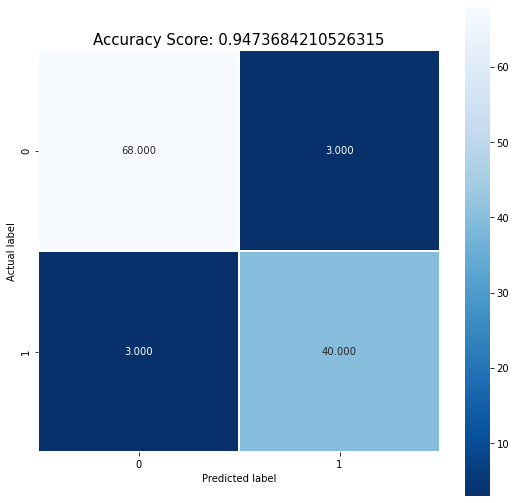

In [136]:
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, predict_test)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);
plt.savefig('confusion_ruleBased.png')
#plt.show();

# Using a random forest classifier

In [32]:
var = target.sum()
percentage = var/(len(target))
print(percentage)

0.37258347978910367


In [ ]:
data_selected_1 = data[['area_0', 'concavity_0', 'concave points_0', 'radius_2', 'perimeter_2','area_2', 'concavity_2', 'concave points_2']] #Only keeping columns selected by SelectFromModel
data_selected_2 = data.drop(columns=['fractal dimension_0','smoothness_0','smoothness_1','texture_1','compactness_0']) #Dropping columns with lowest feature importance

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(data,target, test_size = .2, random_state = 42)

In [34]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfClf=RandomForestClassifier(n_estimators=25,max_depth=15,bootstrap=False)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfClf.fit(X_train,Y_train)

y_pred=rfClf.predict(X_test)

In [35]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9649122807017544


In [ ]:
from sklearn.model_selection import cross_val_score

#5 fold cross-validation score
RF_cross_val = cross_val_score(rfClf, X_train, Y_train, cv=5)
print(RF_cross_val.mean())


In [36]:
from sklearn.model_selection import GridSearchCV
gs_clf_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': (10, 25, 50, 75, 100), 'max_depth': (3,5,7,11,15), 'bootstrap': (False, True), 'min_impurity_decrease': (0.0, 0.1, 0.5, 1.0), 'min_weight_fraction_leaf': (0.0, 0.1, 0.5, 1.0)})
#gs_clf_rf = gs_clf_rf.fit(X_train, Y_train)
#print(gs_clf_rf.best_score_)
#print(gs_clf_rf.best_params_)

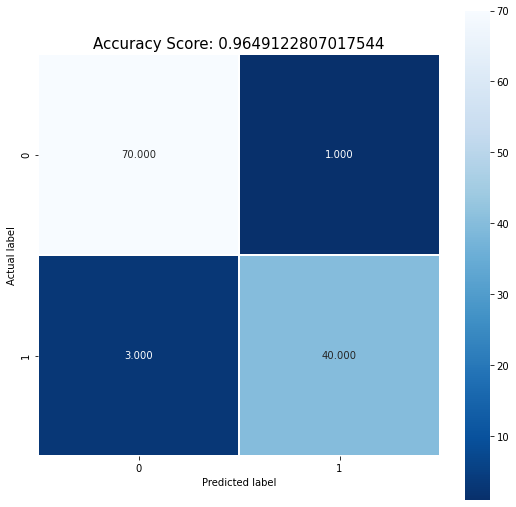

In [37]:
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(Y_test, y_pred))
plt.title(all_sample_title, size = 15);
#plt.show();

In [38]:
import pandas as pd
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators=25,max_depth=15,bootstrap=False))
sel.fit(X_train, Y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=False, max_depth=15,
                                                 n_estimators=25))

In [39]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

9

In [40]:
print(selected_feat)

Index(['radius_0', 'perimeter_0', 'area_0', 'concave points_0', 'radius_2',
       'perimeter_2', 'area_2', 'concavity_2', 'concave points_2'],
      dtype='object')


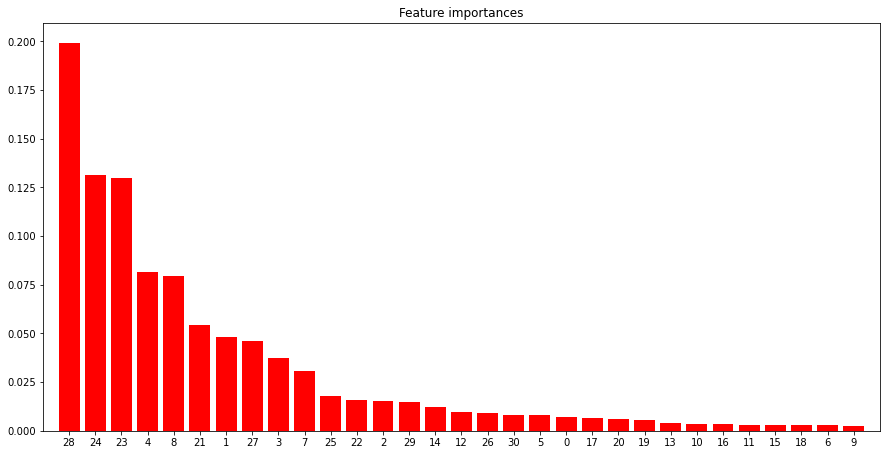

In [41]:
importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
# X is the train data used to fit the model 
plt.figure(figsize=(15,7.5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [42]:
feature_names = list(data.columns.values) 
estimator = rfClf.estimators_[5]

In [43]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = ['benign','malignant'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

# Creating our own classifier

In [44]:
# pip install git+git://github.com/christophM/rulefit.git

### Testing rule fit

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(data,target, test_size = .2, random_state = 42)

In [46]:
X = X_train.to_numpy()
x2 = X_test.to_numpy()

In [47]:
from rulefit import RuleFit

rf = RuleFit(tree_size=4, sample_fract='default', max_rules=30,
             memory_par=0.01,
             tree_generator=None,
             rfmode='classify', lin_trim_quantile=0.025,
             lin_standardise=True, exp_rand_tree_size=True, random_state=1)
rf.fit(X, Y_train, feature_names=feature_names)

#predict
y_pred = rf.predict(x2)
y_proba = rf.predict_proba(X)

In [48]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9736842105263158


In [49]:
rules = rf.get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)
num_rules_rule=len(rules[rules.type=='rule'])
num_rules_linear=len(rules[rules.type=='linear'])

print(num_rules_rule)
print(num_rules_linear)

rules_importance = rules.sort_values(by='importance', ascending=False)
rules_importance



9
14


rule    type          coef  \
11                                           radius_1  linear  1.088780e+01   
22                                          texture_2  linear  2.884364e-01   
27                                        concavity_2  linear  6.584365e+00   
16                                      compactness_1  linear -5.960557e+01   
10                                fractal dimension_0  linear -1.496501e+02   
29                                         symmetry_2  linear  1.528244e+01   
57             concave points_2 <= 0.1465499997138977    rule -1.575166e+00   
9                                          symmetry_0  linear -2.840331e+01   
12                                          texture_1  linear -1.410400e+00   
40  area_2 > 718.6499938964844 & concave points_0 ...    rule  1.350153e+00   
28                                   concave points_2  linear  9.323104e+00   
37            concave points_0 <= 0.05127999931573868    rule -1.184242e+00   
31  area_2 <= 957.4500122070312 & concave points_0...    rule -1.158280e+00   
34  area_2 <= 927.1000061035156 & concave points_2...    rule -1.064423e+00   
44                        area_2 <= 884.5499877929688    rule -8.853422e-01   
38  concave points_0 > 0.05127999931573868 & conca...    rule  8.557071e-01   
2                                           texture_0  linear  5.303152e-02   
25                                       smoothness_2  linear  6.395804e+00   
1                                            radius_0  linear -3.035018e-02   
32  perimeter_2 <= 114.45000076293945 & concave po...    rule -7.116854e-01   
19                                         symmetry_1  linear -1.208938e+01   
0                                                  id  linear -2.561115e-09   
42  concave points_0 > 0.05127999931573868 & fract...    rule -9.031472e-02   

     support  importance  
11  1.000000    2.499442  
22  1.000000    1.659031  
27  1.000000    1.289213  
16  1.000000    1.015738  
10  1.000000    0.965949  
29  1.000000    0.883777  
57  0.660793    0.745747  
9   1.000000    0.737803  
12  1.000000    0.679410  
40  0.356828    0.646809  
28  1.000000    0.596450  
37  0.603524    0.579290  
31  0.603524    0.566590  
34  0.612335    0.518605  
44  0.674009    0.414999  
38  0.334802    0.403826  
2   1.000000    0.211403  
25  1.000000    0.139716  
1   1.000000    0.100156  
32  0.017621    0.093636  
19  1.000000    0.088768  
0   1.000000    0.077641  
42  0.039648    0.017623

In [50]:
rules_importance.iloc[2]['rule']

'concavity_2'

In [51]:
rules_rule_importance = rules_importance[rules_importance['type']=='rule']
rules_linear_importance = rules_importance[rules_importance['type']=='linear']

In [52]:
rules_rule_importance

rule  type      coef  \
57             concave points_2 <= 0.1465499997138977  rule -1.575166   
40  area_2 > 718.6499938964844 & concave points_0 ...  rule  1.350153   
37            concave points_0 <= 0.05127999931573868  rule -1.184242   
31  area_2 <= 957.4500122070312 & concave points_0...  rule -1.158280   
34  area_2 <= 927.1000061035156 & concave points_2...  rule -1.064423   
44                        area_2 <= 884.5499877929688  rule -0.885342   
38  concave points_0 > 0.05127999931573868 & conca...  rule  0.855707   
32  perimeter_2 <= 114.45000076293945 & concave po...  rule -0.711685   
42  concave points_0 > 0.05127999931573868 & fract...  rule -0.090315   

     support  importance  
57  0.660793    0.745747  
40  0.356828    0.646809  
37  0.603524    0.579290  
31  0.603524    0.566590  
34  0.612335    0.518605  
44  0.674009    0.414999  
38  0.334802    0.403826  
32  0.017621    0.093636  
42  0.039648    0.017623

In [53]:
#rules_linear_importance.head()
print('Most important rules: \n')
for i in range(9):
    print(rules_rule_importance.iloc[i]['rule'])

Most important rules: 

concave points_2 <= 0.1465499997138977
area_2 > 718.6499938964844 & concave points_0 > 0.05127999931573868
concave points_0 <= 0.05127999931573868
area_2 <= 957.4500122070312 & concave points_0 <= 0.055800000205636024
area_2 <= 927.1000061035156 & concave points_2 <= 0.14124999940395355
area_2 <= 884.5499877929688
concave points_0 > 0.05127999931573868 & concavity_2 > 0.26135000586509705
perimeter_2 <= 114.45000076293945 & concave points_2 > 0.14705000072717667 & texture_2 <= 26.28499984741211
concave points_0 > 0.05127999931573868 & fractal dimension_0 > 0.060990000143647194 & concavity_2 <= 0.26135000586509705


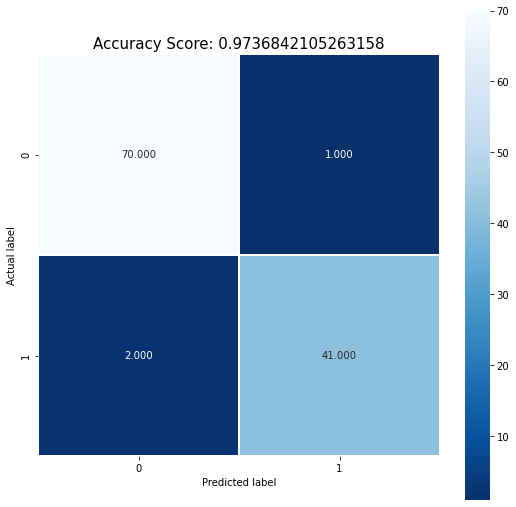

In [54]:
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(Y_test, y_pred))
plt.title(all_sample_title, size = 15);
#plt.show();

# Looking at the ten most important features 

## Random forest

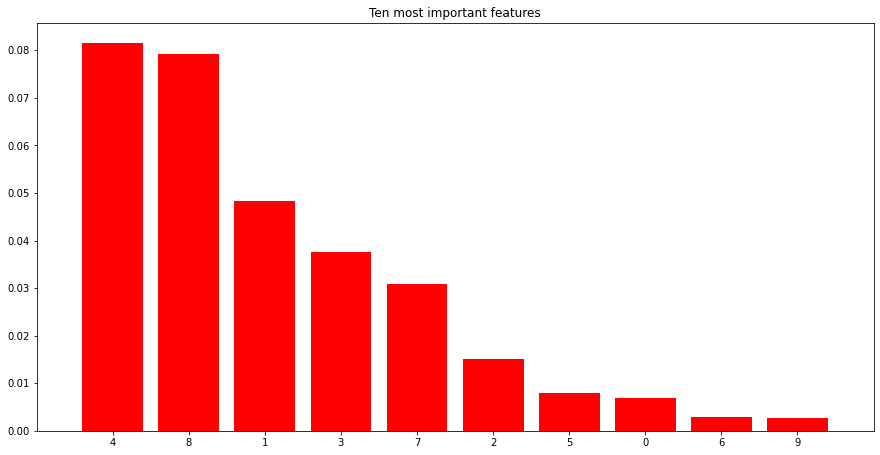

In [55]:
importances = sel.estimator_.feature_importances_[0:10]
indices = np.argsort(importances)[::-1][0:10]
# X is the train data used to fit the model 
plt.figure(figsize=(15,7.5))
plt.title("Ten most important features")
plt.bar(range(len(indices)), importances[indices],
       color="r", align="center")
plt.xticks(range(len(indices)), indices)
plt.xlim([-1, len(indices)])
plt.show()

In [56]:
print('Most important features: \n ')
best_features_rf = []

for i in indices:
    best_features_rf.append(feature_names[i])
    print(feature_names[i])

Most important features: 
 
area_0
concave points_0
radius_0
perimeter_0
concavity_0
texture_0
smoothness_0
id
compactness_0
symmetry_0


## Rule Fit model

In [57]:
ruleFit_feature_importances_ = rules_linear_importance['importance'].to_numpy()
ruleFit_feature_names_ = rules_linear_importance['rule'].to_numpy()

array(['radius_1', 'perimeter_1', 'perimeter_2', 'compactness_1', 'id',
       'concave points_0', 'concave points_2', 'texture_1',
       'smoothness_2', 'area_2', 'concavity_1', 'concavity_2',
       'compactness_2', 'area_0', 'symmetry_1', 'area_1',
       'fractal dimension_1', 'fractal dimension_2', 'concave points_1',
       'smoothness_1', 'radius_2', 'compactness_0', 'concavity_0',
       'perimeter_0', 'smoothness_0', 'symmetry_0', 'texture_0',
       'texture_2', 'radius_0', 'symmetry_2', 'fractal dimension_0'],
      dtype=object)

In [58]:
def retrieveIndex(name):
    for i in range(len(feature_names)):
        if feature_names[i]==name:
            return i

In [59]:
feature_indicies = []
for feature in ruleFit_feature_names_:
    index = retrieveIndex(feature)
    feature_indicies.append(retrieveIndex(feature))

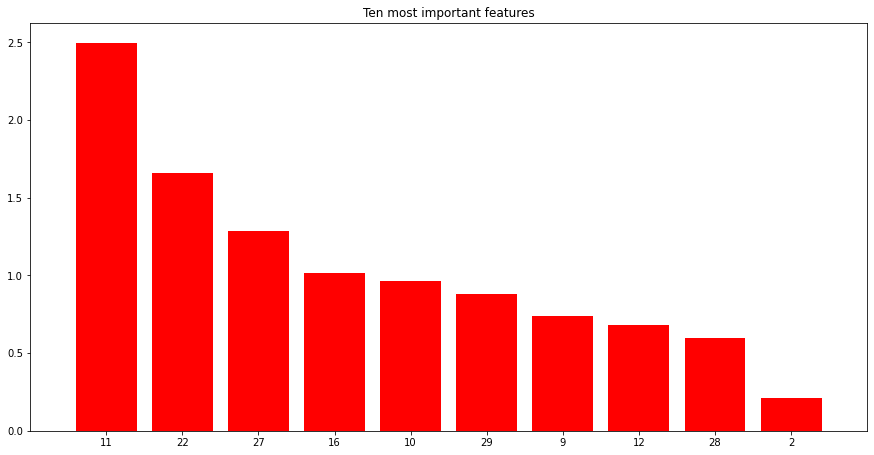

In [60]:
importances = ruleFit_feature_importances_[0:10]
indices = feature_indicies[0:10]

# X is the train data used to fit the model 
plt.figure(figsize=(15,7.5))
plt.title("Ten most important features")
plt.bar(range(len(indices)), importances,
       color="r", align="center")
plt.xticks(range(len(indices)), indices)
plt.xlim([-1, len(indices)])
plt.savefig('importance_ruleFit.png')
plt.show()

In [62]:
print('Most important features: \n ')
best_features_ruleFit = []
p = 0
for i in indices:
    p += 1
    best_features_ruleFit.append(feature_names[i])
    print(p, ': ', feature_names[i])

Most important features: 
 
1 :  radius_1
2 :  texture_2
3 :  concavity_2
4 :  compactness_1
5 :  fractal dimension_0
6 :  symmetry_2
7 :  symmetry_0
8 :  texture_1
9 :  concave points_2
10 :  texture_0


In [63]:
df = pd.DataFrame(best_features_ruleFit)
df['Importance'] = importances
df

0  Importance
0             radius_1    2.499442
1            texture_2    1.659031
2          concavity_2    1.289213
3        compactness_1    1.015738
4  fractal dimension_0    0.965949
5           symmetry_2    0.883777
6           symmetry_0    0.737803
7            texture_1    0.679410
8     concave points_2    0.596450
9            texture_0    0.211403

## Now, for the two latter classifiers, lets try to only use the 10 most important features and see what happens with the accuracy

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(data,target, test_size = .2, random_state = 42)

In [65]:
X_train_rf = X_train[best_features_rf]
X_test_rf = X_test[best_features_rf]
X_train_ruleFit = X_train[best_features_ruleFit]
X_test_ruleFit = X_test[best_features_ruleFit]

## Random forest

In [66]:
rfClf2=RandomForestClassifier(n_estimators=25,max_depth=15,bootstrap=False)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfClf2.fit(X_train_rf,Y_train)

y_pred=rfClf2.predict(X_test_rf)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9385964912280702


## Rule fit

In [67]:
X = X_train_ruleFit.to_numpy()
x2 = X_test_ruleFit.to_numpy()

rf2 = RuleFit(tree_size=4, sample_fract='default', max_rules=30,
             memory_par=0.01,
             tree_generator=None,
             rfmode='classify', lin_trim_quantile=0.025,
             lin_standardise=True, exp_rand_tree_size=True, random_state=1)
rf2.fit(X, Y_train, feature_names=best_features_ruleFit)

#predict
y_pred = rf2.predict(x2)
y_proba = rf2.predict_proba(X)

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9298245614035088
